A regressão logísitca é um método de classificação. Tem aplicações das mais variadas como por exemplo:
* Filtro de e-mails (spam ou não)
* Modelos preditores de clientes
* Diagnóstico de doenças

A regressão logística permite resolver problemas de classificação quanto tenta-se predizer categorias  discretas. Por convenção utiliza-se a classificação binária (0 e 1).

A regressão logísitca se comporta melhor para com a teoria da probabilidade uma vez que qualquer valor computado/predito vai estar entre 0 e 1 uma vez que a função logística (também conhecida como sigmóide) so retorna valores entre 0 e 1. 

A expressão logísitica é dada pela seguinte fórmula:

$$  \phi  (z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-Z} }  $$ 

Ao analisar a fórmula podemos inferir que é possivel adequar/transformar uma regressão linear em uma regressão logística, dessa forma a fórmula ficaria:

$$  \phi  (z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-(b_0 + b_1 x)} }  $$ 

Da mesma forma que a regressão linear, antes de iniciar a construção do mesmo os dados devem ser separados em treino e teste e após construído o modelo o mesmo deve ser testado com os dados de teste. No entanto a forma de avaliação difere da regressão linear, para a regressão logística a avaliação é realizad com uma matriz de confusão.

**MATRIZ DE CONFUSÂO**

É uma métrica voltada para modelos de classificação binária que tem como objetivo calcular falsos positivos, falsos negativos, verdadeiros positivos e verdadeiros negativos. 

|   | Valor predito: NÃO | Valor predito: SIM
:--------- | :------: | :-------:
Valor Correto: NÃO | 50 (TN) | 10 FP
Valor Correto: SIM | 5 (FN) | 100 TP

Onde a terminologia básica é:
* TP - True positive
* TN - True negative
* FP - False positive
* FP - False negative

A construção da matriz de confusão proporciona meios de avaliar o modelo sendo as principais métricas:
* Precisão: representa o quanto em média o modelo acerta. Pode ser calculado pelo somatório dos casos verdadeiros dividindo pelo nº de observações:
$$  Precisão =  \frac{\mathrm{TP + TN} }{\mathrm{Nº de Observações} }  $$ 

* Sensibilidade: é a proporção dos casos positivos que foram identificados corretamente.
* Especificidade: é a proporção dos casos negativos que foram identificados corretamente.
* Acurácia: é a proporção de casos que foram corretamente previstos (casos verdadeiros e falsos que foram corretamente previstos (TP e TN))

Ainda, é importante ressaltar sobre a análise dos erros. Quando o modelo acusa um falso positivo têm-se um erro do Tipo I e quando o modelo acusa um falso negativo têm-se um erro do Tipo II

# Imports

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

%matplotlib inline

In [5]:
train = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Esploration

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


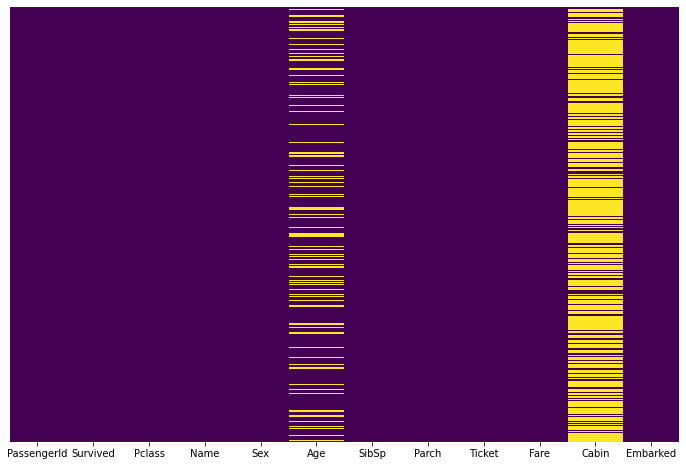

In [17]:
# Checando a densidade dos dados faltantes
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

<AxesSubplot:xlabel='Survived', ylabel='count'>

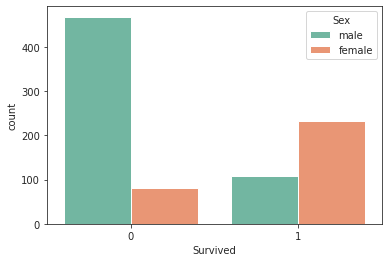

In [37]:
# Verificando o total de sobrevivente e não sobreviventes 
sns.set_style('ticks')
sns.countplot(x='Survived', data=train, hue = 'Sex', palette='Set2')

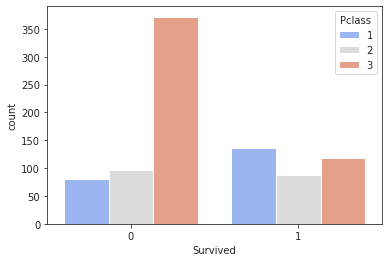

In [38]:
# Verificando sobreviventes e não sobreviventes por classe
sns.countplot(x='Survived', data=train, hue='Pclass', palette='coolwarm');

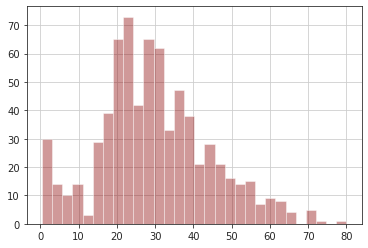

In [41]:
train['Age'].hist(bins=30, color='darkred', alpha=0.4);

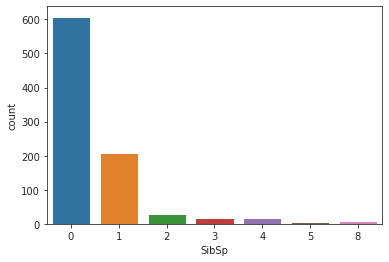

In [44]:
sns.countplot(x='SibSp', data=train);

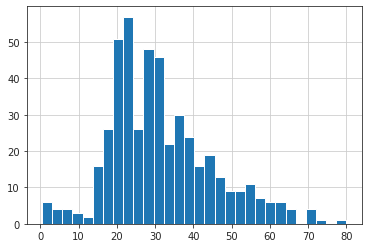

In [46]:
train[train['SibSp'] == 0]['Age'].hist(bins=30);

<AxesSubplot:>

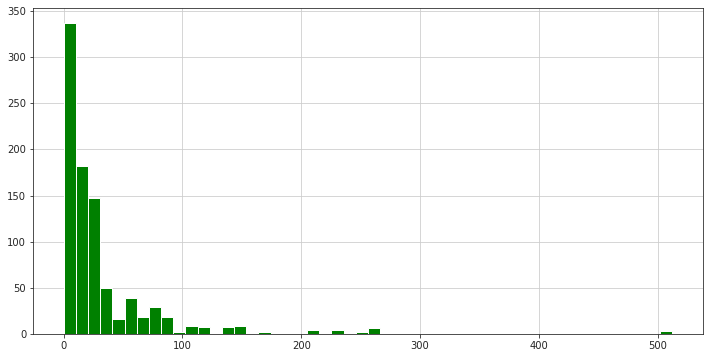

In [47]:
train['Fare'].hist(color = 'green', bins =50, figsize=(12,6))

<AxesSubplot:>

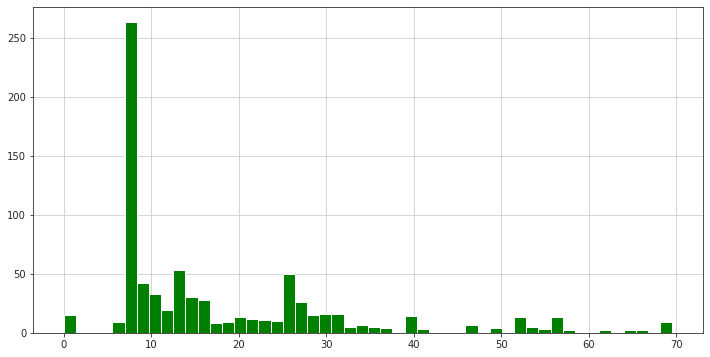

In [48]:
train[train['Fare']< 70]['Fare'].hist(color = 'green', bins =50, figsize=(12,6))